In [1023]:
#EKIN CELEBI
#150160152
#########################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random

from scipy.spatial import distance
#import any other non-machine learning modules that you wish
#SHORTCUTS: Alt + Enter includes new cell below, CTRL + Enter executes the current cell
##########################
df1 = pd.read_csv("train1.csv") 
df2 = pd.read_csv("train2.csv") 
#df2m = pd.read_csv("train2_modified.csv") #will be used in Part D

In [ ]:
#Implmenet PART A:

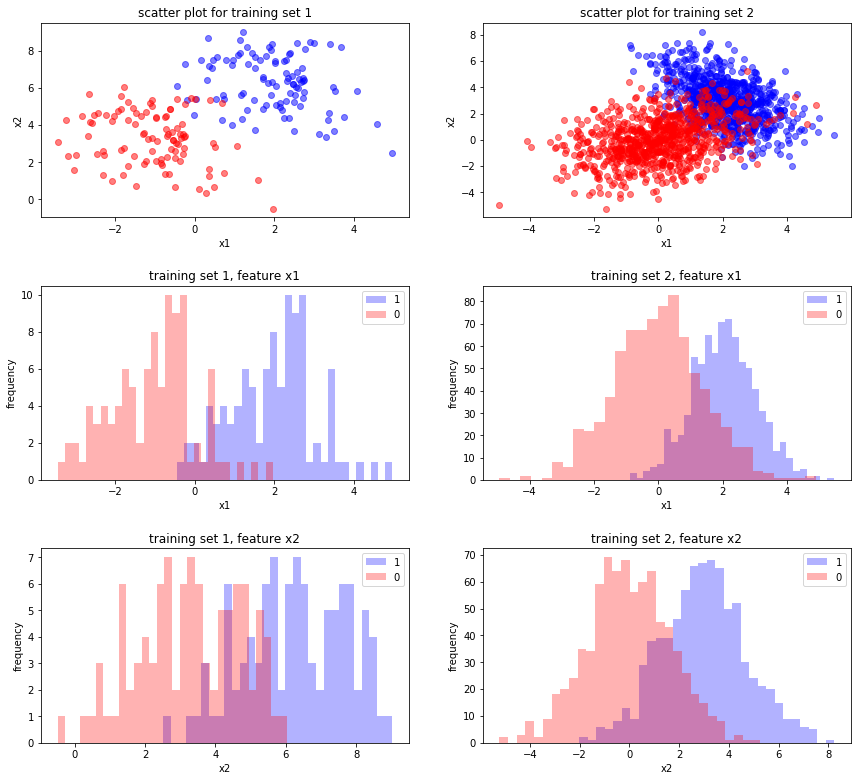

In [908]:
df1one = df1[df1.y == 1]
df1zero = df1[df1.y == 0]

df2one = df2[df2.y == 1]
df2zero = df2[df2.y == 0]


fig, axs = plt.subplots(3, 2)
plt.subplots_adjust(bottom=0.5, right=2, top=3, hspace = 0.35)



axs[0, 0].plot(df1one.x1,df1one.x2, 'bo',alpha=0.5)
axs[0, 0].plot(df1zero.x1,df1zero.x2, 'ro',alpha=0.5)
axs[0, 0].set_title('scatter plot for training set 1')
axs[0, 0].set_xlabel('x1')
axs[0, 0].set_ylabel('x2')

#####

axs[1, 0].hist(df1one.x1,color = 'b', bins=30, alpha=0.3)
axs[1, 0].hist(df1zero.x1,color = 'r', bins=30, alpha=0.3)
axs[1, 0].set_title('training set 1, feature x1')
axs[1, 0].set_xlabel('x1')
axs[1, 0].set_ylabel('frequency')
axs[1, 0].legend(['1','0'])

#####


axs[2, 0].hist(df1one.x2,color = 'b', bins=30, alpha=0.3)
axs[2, 0].hist(df1zero.x2, color = 'r',bins=30, alpha=0.3)
axs[2, 0].set_title('training set 1, feature x2')
axs[2, 0].set_xlabel('x2')
axs[2, 0].set_ylabel('frequency')
axs[2, 0].legend(['1','0'])


axs[0, 1].plot(df2one.x1,df2one.x2, 'bo',alpha=0.5)
axs[0, 1].plot(df2zero.x1,df2zero.x2, 'ro',alpha=0.5)
axs[0, 1].set_title('scatter plot for training set 2')
axs[0, 1].set_xlabel('x1')
axs[0, 1].set_ylabel('x2')

#####

axs[1, 1].hist(df2one.x1,color = 'b', bins=30, alpha=0.3)
axs[1, 1].hist(df2zero.x1, color = 'r',bins=30, alpha=0.3)
axs[1, 1].set_title('training set 2, feature x1')
axs[1, 1].set_xlabel('x1')
axs[1, 1].set_ylabel('frequency')
axs[1, 1].legend(['1','0'])

#####


axs[2, 1].hist(df2one.x2,color = 'b', bins=30, alpha=0.3)
axs[2, 1].hist(df2zero.x2, color = 'r',bins=30, alpha=0.3)
axs[2, 1].set_title('training set 2, feature x2')
axs[2, 1].set_xlabel('x2')
axs[2, 1].set_ylabel('frequency')
axs[2, 1].legend(['1','0'])
                    



dataset1 class1, dataset1 class0, dataset2 class1, dataset2 class0 respectively


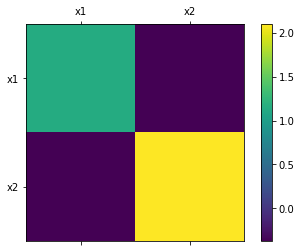

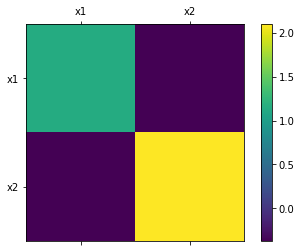

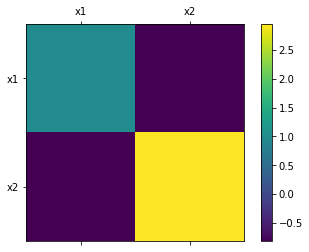

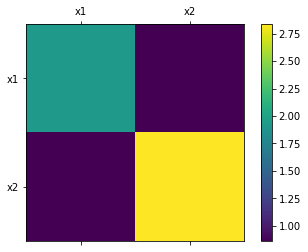

In [1024]:
df1_one_cov = pd.DataFrame(df1one,columns=['x1', 'x2']).cov()
df1_zero_cov = pd.DataFrame(df1zero,columns=['x1', 'x2']).cov()
df2_one_cov = pd.DataFrame(df2one,columns=['x1', 'x2']).cov()
df2_zero_cov = pd.DataFrame(df2zero,columns=['x1', 'x2']).cov()
####

cov_matrices_df1 = [df1_one_cov, df1_zero_cov,df2_one_cov, df2_zero_cov]

alpha = ['x1', 'x2']

print('dataset1 class1, dataset1 class0, dataset2 class1, dataset2 class0 respectively')

for x in cov_matrices_df1:
    fig = plt.figure()
    ax = fig.add_subplot(111)

    cax = ax.matshow(x,interpolation='nearest') #cov. matrix of dataset1
    fig.colorbar(cax)
    ax.set_xticklabels(['']+alpha)
    ax.set_yticklabels(['']+alpha)





In [ ]:
#Implmenet PART B:

In [1026]:
#Implmenet PART B:
#test1 = df.read_csv("test1.csv")
#test2 = df.read_csv("test2.csv")

#vector_row = np.array([1, 2, 3])
df1_class1_mean = np.array([[np.mean(df1one.x1),np.mean(df1one.x2)]])

print('dataset1 class 1 mean')
print(df1_class1_mean)
print()
df1_class0_mean = np.array([[np.mean(df1zero.x1),np.mean(df1zero.x2)]])
print('dataset1 class 0 mean')
print(df1_class0_mean)
print()

print('dataset1 class 0 covariance')
df1_zero_cov_arr = np.array([[df1_zero_cov.iloc[0].x1,df1_zero_cov.iloc[0].x2],
                             [df1_zero_cov.iloc[1].x1,df1_zero_cov.iloc[1].x2]])
print(df1_zero_cov_arr)
print()
print('dataset1 class 1 covariance')
df1_zero_cov_arr = np.array([[df1_one_cov.iloc[0].x1,df1_one_cov.iloc[0].x2],
                             [df1_one_cov.iloc[1].x1,df1_one_cov.iloc[1].x2]])
print(df1_zero_cov_arr)


print('*******************')


df2_class1_mean = np.array([[np.mean(df2one.x1),np.mean(df2one.x2)]])

print('dataset1 class 1 mean')
print(df2_class1_mean)
print()
df2_class0_mean = np.array([[np.mean(df2zero.x1),np.mean(df2zero.x2)]])
print('dataset2 class 0 mean')
print(df2_class0_mean)
print()

print('dataset2 class 0 covariance')
df2_zero_cov_arr = np.array([[df2_zero_cov.iloc[0].x1,df2_zero_cov.iloc[0].x2],
                             [df2_zero_cov.iloc[1].x1,df2_zero_cov.iloc[1].x2]])
print(df2_zero_cov_arr)
print()
print('dataset2 class 1 covariance')
df2_zero_cov_arr = np.array([[df2_one_cov.iloc[0].x1,df2_one_cov.iloc[0].x2],
                             [df2_one_cov.iloc[1].x1,df2_one_cov.iloc[1].x2]])
print(df2_zero_cov_arr)

dataset1 class 1 mean
[[1.95375302 6.26924606]]

dataset1 class 0 mean
[[-1.04624698  3.26924606]]

dataset1 class 0 covariance
[[ 1.1470413  -0.37697361]
 [-0.37697361  2.1043151 ]]

dataset1 class 1 covariance
[[ 1.1470413  -0.37697361]
 [-0.37697361  2.1043151 ]]
*******************
dataset1 class 1 mean
[[2.0536608  2.97765078]]

dataset2 class 0 mean
[[ 0.00246486 -0.01971604]]

dataset2 class 0 covariance
[[1.92211159 0.85797698]
 [0.85797698 2.83934376]]

dataset2 class 1 covariance
[[ 0.99769947 -0.81880324]
 [-0.81880324  2.94962903]]


In [990]:
def covariance_matrix(arg):
    cov_m = pd.DataFrame(arg,columns=['x1', 'x2']).cov()
    return np.array([[cov_m.iloc[0].x1,cov_m.iloc[0].x2],
                             [cov_m.iloc[1].x1,cov_m.iloc[1].x2]])
    

In [991]:
def mean_matrix(arg):
    return np.array([[np.mean(arg.x1),np.mean(arg.x2)]])

In [992]:
def constant_variance(df_class_i,df_class_j, x_matrix):
    #case 2 
    pCi = len(df_class_i.index)/(len(df_class_i.index)+len(df_class_j.index))
    
    mean_i = mean_matrix(df_class_i)
    
    covar_i = covariance_matrix(df_class_i)
    
    variance = covar_i[0,0]
    
    k = (np.dot(mean_i,x_matrix))/variance
    l = -(np.dot(mean_i,mean_i.transpose()))/(2*variance)
    g_x = k+l + np.log(pCi)
    
    return g_x

In [993]:
def same_covariance(df_class_i,df_class_j, x_matrix):
    #case 1
    
    pCi = len(df_class_i.index)/(len(df_class_i.index)+len(df_class_j.index))
    
    
    
    mean_i = mean_matrix(df_class_i)
    covar_i = covariance_matrix(df_class_i)
    
    
    x = np.dot(mean_i,np.linalg.inv(covar_i))
    y = np.dot(x,x_matrix)
    z = np.dot(x,mean_i.transpose())
    g_x = y + np.log(pCi) - (z/2)
    
    return g_x

In [994]:
def general_case(df_class_i,df_class_j, x_matrix):
    
    pCi = len(df_class_i.index)/(len(df_class_i.index)+len(df_class_j.index))
    
    
    
    mean_i = mean_matrix(df_class_i)
    covar_i = covariance_matrix(df_class_i)
    det_covar = np.linalg.det(covar_i)
    
    
    a = (np.subtract(x_matrix,mean_i.transpose())).transpose()
    b = np.subtract(x_matrix,mean_i.transpose())
    c = np.dot(a,b)
 

    g_x = -(c/2) -((np.log(det_covar))/2) + np.log(pCi)
    return g_x

In [1027]:
def trainBayes(class_i, class_j, sample_matrix):
    
    covar_i = covariance_matrix(class_i)
    covar_j = covariance_matrix(class_j)
    
    if covar_i.all() == covar_j.all():  
        
       
        return same_covariance(class_i,class_j, sample_matrix)
    elif covar_i[1,0] == covar_j[1,0] == covar_i[0,1] == covar_j[0,1] == 0:
        if covar_i[0,0] == covar_i[1,1] and covar_j[0,0] == covar_j[1,1]:
            
       
            return constant_variance(class_i,class_j, sample_matrix)
        else:
            
            return general_case(class_i,class_j, sample_matrix)
            
    else: 
        return general_case(class_i,class_j, sample_matrix)



In [1028]:
test1 = pd.read_csv("test1.csv")
test2 = pd.read_csv("test2.csv")


In [1029]:
sample = [None for x in range(len(test1))]
misclas1 = 0

for i in range(len(test1)):
    sample[i] = np.array([[test1.loc[i].x1],[test1.loc[i].x2]])



for j in range(len(sample)):
    #here i tested for if it belongs to class 1 
    if trainBayes(df1one,df1zero,sample[j]) > 0 and test1.loc[j].y == 0:
        #should be pos if it belongs to class1
        misclas1 += 1
    if trainBayes(df1one,df1zero,sample[j]) < 0 and test1.loc[j].y == 1:
        misclas1 +=1
    


In [1030]:
sample2 = [None for x in range(len(test2))]
misclas2 = 0

for i in range(len(test2)):
    sample2[i] = np.array([[test2.loc[i].x1],[test2.loc[i].x2]])


for j in range(len(sample2)):
    sample_gi_2[j] = trainBayes(df2one,df2zero,sample2[j])
    #here i tested for if it belongs to class 1 
    if trainBayes(df2one,df2zero,sample2[j]) > 0 and test2.loc[j].y == 0:
        misclas2 += 1
    elif trainBayes(df2one,df2zero,sample2[j]) < 0 and test2.loc[j].y == 1:
        misclas2 +=1

In [1013]:
error1 = (misclas1*100)/len(test1)
print('error rate test set 1')
print(error1)


7.0

In [1033]:
error2 = (misclas2*100)/len(test2)
print('error rate test set 2')
print(error2)

error rate test set 2
12.75


In [1034]:
#Implmenet PART D:

Text(0, 0.5, 'x2')

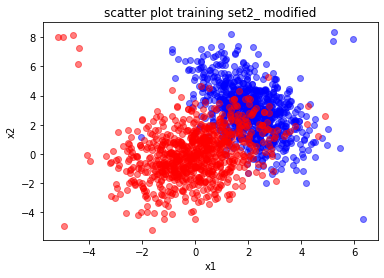

In [1035]:
df3 = pd.read_csv("train2_modified.csv")
df3one = df3[df3.y == 1]
df3zero = df3[df3.y == 0]

plt.plot(df3one.x1,df3one.x2, 'bo',alpha=0.5)
plt.plot(df3zero.x1,df3zero.x2, 'ro',alpha=0.5)
plt.title('scatter plot training set2_ modified')
plt.xlabel('x1')
plt.ylabel('x2')



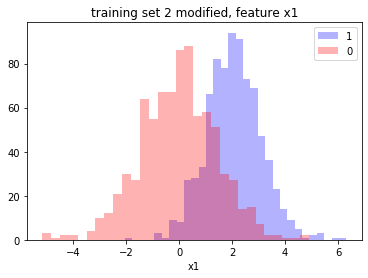

In [1036]:
plt.hist(df3one.x1,color = 'b', bins=30, alpha=0.3)
plt.hist(df3zero.x1,color = 'r', bins=30, alpha=0.3)
plt.title('training set 2 modified, feature x1')
plt.xlabel('x1')
plt.legend(['1','0'])

#####


#the range of x1 has expanded

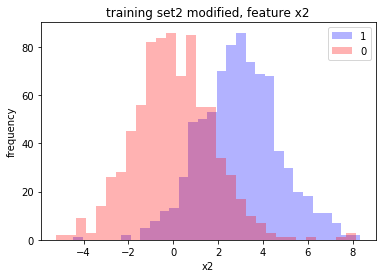

In [1037]:
plt.hist(df3one.x2,color = 'b', bins=30, alpha=0.3)
plt.hist(df3zero.x2,color = 'r', bins=30, alpha=0.3)
plt.title('training set2 modified, feature x2')
plt.xlabel('x2')
plt.ylabel('frequency')
plt.legend(['1','0'])

In [1044]:
sample3 = [None for x in range(len(test2))]
misclas3 = 0

for i in range(len(test2)):
    sample3[i] = np.array([[test2.loc[i].x1],[test2.loc[i].x2]])

for j in range(len(sample3)):
    
    #here i tested for if it belongs to class 1 
    if trainBayes(df3one,df3zero,sample3[j]) > 0 and test2.loc[j].y == 0:
        misclas3 += 1
    elif trainBayes(df3one,df3zero,sample3[j]) < 0 and test2.loc[j].y == 1:
        misclas3 +=1

In [1045]:
error3 = (misclas3*100)/len(test2)
error3

12.75